**a hand wrtiting one answer will be submitted on paper for 1.1**



In [110]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [111]:

train_data = pd.read_excel("/content/Asssignment4_Data.xlsx", "Train")
test_data = pd.read_excel("/content/Asssignment4_Data.xlsx", "Test")

In [112]:

# Display the first few rows of the training data to understand its structure
train_data.head(), train_data.info(), test_data.head(), test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           20 non-null     int64  
 1   Local Price        20 non-null     float64
 2   Bathrooms          20 non-null     float64
 3   Land Area          20 non-null     float64
 4   Living area        20 non-null     float64
 5   # Garages          20 non-null     float64
 6   # Rooms            20 non-null     int64  
 7   # Bedrooms         20 non-null     int64  
 8   Age of home        20 non-null     int64  
 9   Construction type  20 non-null     object 
dtypes: float64(5), int64(4), object(1)
memory usage: 1.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           5 non-null      int64  
 1   Local Pri

(   House ID  Local Price  Bathrooms  Land Area  Living area  # Garages  \
 0         1       4.9176        1.0      3.472        0.998        1.0   
 1         2       5.0208        1.0      3.531        1.500        2.0   
 2         3       4.5429        1.0      2.275        1.175        1.0   
 3         4       4.5573        1.0      4.050        1.232        1.0   
 4         5       5.0597        1.0      4.455        1.121        1.0   
 
    # Rooms  # Bedrooms  Age of home Construction type  
 0        7           4           42         Apartment  
 1        7           4           62             House  
 2        6           3           40             Condo  
 3        6           3           54         Apartment  
 4        6           3           42         Apartment  ,
 None,
    House ID  Local Price  Bathrooms  Land Area  Living area  # Garages  \
 0        24       6.0931        1.5     6.7265        1.652        1.0   
 1        25       8.3607        1.5     9.1500 

In [113]:
# Get unique values
construction_types = train_data['Construction type'].value_counts()

construction_types


,count
Construction type,
Apartment,7
House,7
Condo,6


In [114]:
train_data


,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,1,4.9176,1.0,3.4720,0.998,1.0,7,4,42,Apartment
1,2,5.0208,1.0,3.5310,1.500,2.0,7,4,62,House
2,3,4.5429,1.0,2.2750,1.175,1.0,6,3,40,Condo
3,4,4.5573,1.0,4.0500,1.232,1.0,6,3,54,Apartment
4,5,5.0597,1.0,4.4550,1.121,1.0,6,3,42,Apartment
5,6,3.8910,1.0,4.4550,0.988,1.0,6,3,56,Condo
6,7,5.8980,1.0,5.8500,1.240,1.0,7,3,51,Condo
7,8,5.6039,1.0,9.5200,1.501,0.0,6,3,32,House
8,9,16.4202,2.5,9.8000,3.420,2.0,10,5,42,Condo
9,10,14.4598,2.5,12.8000,3.000,2.0,9,5,14,Apartment


In [115]:
test_data

,House ID,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


In [116]:
# Group the training data by
bathrooms_prob = train_data.groupby('Construction type')['Bathrooms'].value_counts(normalize=True)
bathrooms_prob_df = bathrooms_prob.reset_index(name='Conditional Probability')
# Display the result
bathrooms_prob_df.sort_values(by=['Construction type', 'Bathrooms'])

,Construction type,Bathrooms,Conditional Probability
0,Apartment,1.0,0.714286
1,Apartment,1.5,0.142857
2,Apartment,2.5,0.142857
3,Condo,1.0,0.666667
4,Condo,1.5,0.166667
5,Condo,2.5,0.166667
6,House,1.0,0.857143
7,House,1.5,0.142857


**Answer 1.2**

In [117]:
import math

def prob_of_feature(x, m, sd):
    "Calculate the Gaussian probability of a feature."
    return (1 / (math.sqrt(2 * math.pi) * sd)) * math.exp(-(x - m) ** 2 / (2 * sd ** 2))

def prob_of_apartment(localPrice, numBathrooms, landArea, livingArea, numGarages, numRooms, numBedrooms, homeAge):
    #means and standard deviations
    features = {
        'localPrice': (localPrice, 7.33274285714286, 3.6159972353682),
        'numBathrooms': (numBathrooms, 1.28571428571429, 0.566946709513841),
        'landArea': (landArea, 6.10385714285714, 3.25850949712551),
        'livingArea': (livingArea, 1.505, 0.704105815911217),
        'numGarages': (numGarages, 1.21428571428571, 0.698638131005772),
        'numRooms': (numRooms, 6.85714285714286, 1.3451854182691),
        'numBedrooms': (numBedrooms, 3.42857142857143, 0.975900072948533),
        'homeAge': (homeAge, 38.7142857142857, 14.6823509211375)
    }


    prob_of_class_Apartment = 7 / 20

    # Calculate the product of all probabilities
    prob_product = prob_of_class_Apartment
    for feature in features.values():
        x, m, sd = feature
        prob_product *= prob_of_feature(x, m, sd)

    return prob_product


print(prob_of_apartment(5, 1, 4, 1.2, 1, 6, 3, 40))


1.3205733391830079e-06


In [118]:
import math

def prob_of_feature(x, m, sd):
    "Calculate the Gaussian probability of a feature."
    return (1 / (math.sqrt(2 * math.pi) * sd)) * math.exp(-(x - m) ** 2 / (2 * sd ** 2))

def prob_of_condo(localPrice, numBathrooms, landArea, livingArea, numGarages, numRooms, numBedrooms, homeAge):
    #means and standard deviations for the 'Condo' class
    features = {
        'localPrice': (localPrice, 7.4159, 4.6112478580098),
        'numBathrooms': (numBathrooms, 1.33333333333333, 0.605530070819498),
        'landArea': (landArea, 6.02466666666667, 2.54477737074713),
        'livingArea': (livingArea, 1.55333333333333, 0.923441317391996),
        'numGarages': (numGarages, 1.33333333333333, 0.516397779494322),
        'numRooms': (numRooms, 6.83333333333333, 1.60208197875972),
        'numBedrooms': (numBedrooms, 3.33333333333333, 0.816496580927725),
        'homeAge': (homeAge, 39.6666666666667, 13.9522996909709)
    }


    prob_of_class_condo = 6 / 20


    prob_product = prob_of_class_condo
    for feature in features.values():
        x, m, sd = feature
        prob_product *= prob_of_feature(x, m, sd)

    return prob_product


print(prob_of_condo(5, 1, 4, 1.2, 1, 6, 3, 40))


1.030199846868567e-06


In [119]:
import math

def prob_of_feature(x, m, sd):
    "Calculate the Gaussian probability of a feature."
    return (1 / (math.sqrt(2 * math.pi) * sd)) * math.exp(-(x - m) ** 2 / (2 * sd ** 2))

def prob_of_house(localPrice, numBathrooms, landArea, livingArea, numGarages, numRooms, numBedrooms, homeAge):
    #means and standard deviations for the 'House' class
    features = {
        'localPrice': (localPrice, 5.76074285714286, 0.570121270307592),
        'numBathrooms': (numBathrooms, 1.07142857142857, 0.188982236504613),
        'landArea': (landArea, 6.6309, 2.24897321830801),
        'livingArea': (livingArea, 1.39171428571429, 0.212923862985274),
        'numGarages': (numGarages, 1.07142857142857, 0.838081709847526),
        'numRooms': (numRooms, 6.14285714285714, 0.690065559342351),
        'numBedrooms': (numBedrooms, 3, 0.577350269189626),
        'homeAge': (homeAge, 34.2857142857143, 12.724180205607)
    }


    prob_of_class_house = 7 / 20


    prob_product = prob_of_class_house
    for feature in features.values():
        x, m, sd = feature
        prob_product *= prob_of_feature(x, m, sd)

    return prob_product

print(prob_of_house(5, 1, 4, 1.2, 1, 6, 3, 40))


0.00011613753213240067


In [120]:
def determineCorrectness(prob_Apartment, prob_condo, prob_house, actualClass):
    # Map the predicted probabilities to their respective classes
    probs = {
        'Apartment': prob_Apartment,
        'Condo': prob_condo,
        'House': prob_house
    }

    # Determine the class with the highest probability
    predicted_class = max(probs, key=probs.get)

    # Print the predicted class
    print(f"The final predicted class of this example is {predicted_class}")

    # Determine if the prediction is correct
    if predicted_class == actualClass:
        print("This classification is correct.")
        correct = True
    else:
        print(f"This classification is incorrect. The actual class is {actualClass}.")
        correct = False

    return correct

print(determineCorrectness(0.3, 0.5, 0.2, 'Condo'))


The final predicted class of this example is Condo
This classification is correct.
True


In [121]:
# test cases
count= 0
actualClass = 'Apartment'
prop_Apartment = prob_of_apartment(6.0931, 1.5, 6.7265, 1.652, 1, 6, 3, 44)
print("The probability of that this example belongs to class of Apartment is: " + str(prop_Apartment))

prop_condo = prob_of_condo(6.0931, 1.5, 6.7265, 1.652, 1, 6, 3, 44)
print("The probability of that this example belongs to class of Condo is: " + str(prop_condo))

prop_house = prob_of_house(6.0931, 1.5, 6.7265, 1.652, 1, 6, 3, 44)
print("The probability of that this example belongs to class of House is: " + str(prop_house))

if determineCorrectness(prop_Apartment, prop_condo, prop_house, actualClass):
  count += 1

# Output the count of correct classifications
print(f"Number of correct classifications: {count}")


The probability of that this example belongs to class of Apartment is: 1.9821473791611993e-06
The probability of that this example belongs to class of Condo is: 1.71173415925861e-06
The probability of that this example belongs to class of House is: 2.278334632052685e-05
The final predicted class of this example is House
This classification is incorrect. The actual class is Apartment.
Number of correct classifications: 0


In [122]:

actualClass2 = 'House'
prop_Apartment2 = prob_of_apartment(8.3607, 1.5, 9.15, 1.777, 2, 8, 4, 48)
print("The probablity of that this example belongs to class of Apartment is: "+str(prop_Apartment2))

prop_condo2 = prob_of_condo(8.3607, 1.5, 9.15, 1.777, 2, 8, 4, 48)
print("The probablity of that this example belongs to class of Condo is: "+str(prop_condo2))

prop_house2 = prob_of_house(8.3607, 1.5, 9.15, 1.777, 2, 8, 4, 48)
print("The probablity of that this example belongs to class of House is: "+str(prop_house2))

if determineCorrectness(prop_Apartment2, prop_condo2, prop_house2, actualClass2):
  count+=1
  # Output the count of correct classifications
print(f"Number of correct classifications: {count}")

The probablity of that this example belongs to class of Apartment is: 4.855709005221053e-07
The probablity of that this example belongs to class of Condo is: 2.6791172977490374e-07
The probablity of that this example belongs to class of House is: 4.480076553881183e-13
The final predicted class of this example is Apartment
This classification is incorrect. The actual class is House.
Number of correct classifications: 0


In [123]:
actualClass3 = 'House'
prop_Apartment3 = prob_of_apartment(8.14, 1, 8, 1.504, 2, 7, 3, 3)
print("The probablity of that this example belongs to class of Apartment is: "+str(prop_Apartment3))

prop_condo3 = prob_of_condo(8.14, 1, 8, 1.504, 2, 7, 3, 3)
print("The probablity of that this example belongs to class of Condo is: "+str(prop_condo3))

prop_house3 = prob_of_house(8.14, 1, 8, 1.504, 2, 7, 3, 3)
print("The probablity of that this example belongs to class of House is: "+str(prop_house3))

if determineCorrectness(prop_Apartment3, prop_condo3, prop_house3, actualClass3):
  count+=1
# Output the count of correct classifications
print(f"Number of correct classifications: {count}")

The probablity of that this example belongs to class of Apartment is: 6.402867269745773e-08
The probablity of that this example belongs to class of Condo is: 2.4566703656852665e-08
The probablity of that this example belongs to class of House is: 1.3881126178647288e-09
The final predicted class of this example is Apartment
This classification is incorrect. The actual class is House.
Number of correct classifications: 0


In [124]:
actualClass4 = 'Apartment'
prop_Apartment4 = prob_of_apartment(9.1416, 1.5, 7.3262, 1.831, 1.5, 8, 4, 31)
print("The probablity of that this example belongs to class of Apartment is: "+str(prop_Apartment4))

prop_condo4 = prob_of_condo(9.1416, 1.5, 7.3262, 1.831, 1.5, 8, 4, 31)
print("The probablity of that this example belongs to class of Condo is: "+str(prop_condo4))

prop_house4 = prob_of_house(9.1416, 1.5, 7.3262, 1.831, 1.5, 8, 4, 31)
print("The probablity of that this example belongs to class of House is: "+str(prop_house4))

if determineCorrectness(prop_Apartment4, prop_condo4, prop_house4, actualClass4):
  count+=1
  # Output the count of correct classifications
print(f"Number of correct classifications: {count}")

The probablity of that this example belongs to class of Apartment is: 1.1475454140521597e-06
The probablity of that this example belongs to class of Condo is: 1.00808724058537e-06
The probablity of that this example belongs to class of House is: 1.04019926491616e-15
The final predicted class of this example is Apartment
This classification is correct.
Number of correct classifications: 1


In [125]:
actualClass5 = 'Apartment'
prop_Apartment5 = prob_of_apartment(12, 1.5, 5, 1.2, 2, 6, 3, 30)
print("The probablity of that this example belongs to class of Apartment is: "+str(prop_Apartment5))

prop_condo5 = prob_of_condo(12, 1.5, 5, 1.2, 2, 6, 3, 30)
print("The probablity of that this example belongs to class of Condo is: "+str(prop_condo5))

prop_house5 = prob_of_house(12, 1.5, 5, 1.2, 2, 6, 3, 30)
print("The probablity of that this example belongs to class of House is: "+str(prop_house5))

if determineCorrectness(prop_Apartment5, prop_condo5, prop_house5, actualClass5):
  count+=1
print(f"Number of correct classifications: {count}")

The probablity of that this example belongs to class of Apartment is: 4.0742909419261094e-07
The probablity of that this example belongs to class of Condo is: 4.3050932255322124e-07
The probablity of that this example belongs to class of House is: 1.9782531692243267e-31
The final predicted class of this example is Condo
This classification is incorrect. The actual class is Apartment.
Number of correct classifications: 1


In [126]:
#Not all The proportion of all predictions are correct.
print(str(count)+" out of 5 classifications are correct")
print("The accuracy of the classification is " + str(count/5))

1 out of 5 classifications are correct
The accuracy of the classification is 0.2


**Answer 2**

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

#Encode categorical variable
label_encoder = LabelEncoder()
train_data['Construction type'] = label_encoder.fit_transform(train_data['Construction type'])
test_data['Construction type'] = label_encoder.transform(test_data['Construction type'])

# Define features and target
X_train = train_data.drop(columns=['House ID', 'Local Price'])
y_train = train_data['Local Price'] > train_data['Local Price'].median()
X_test = test_data.drop(columns=['House ID', 'Local Price'])
y_test = test_data['Local Price'] > test_data['Local Price'].median()

# Train Decision Tree Classifier with default parameters
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, tree_clf.predict(X_train))
test_accuracy = accuracy_score(y_test, tree_clf.predict(X_test))

train_accuracy, test_accuracy


(1.0, 0.2)

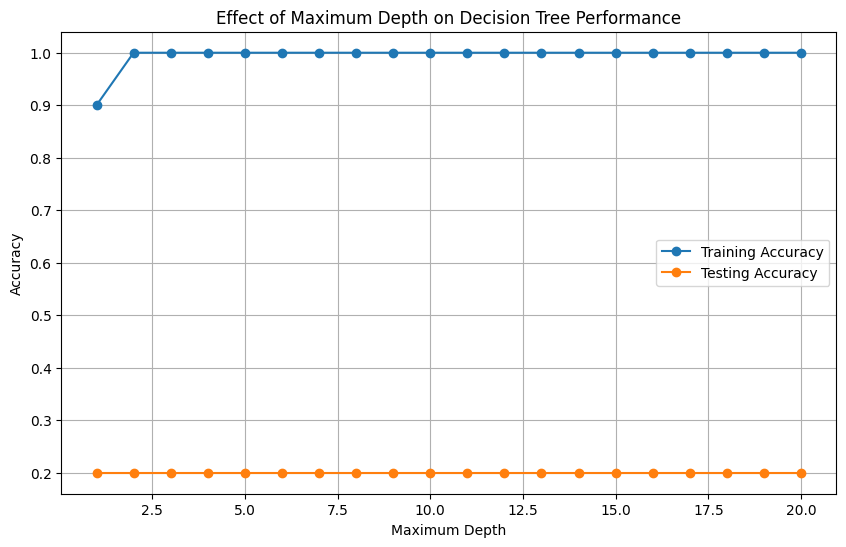

(0.2, 1)

In [128]:
import matplotlib.pyplot as plt

# Evaluate the effect of restricting the maximum depth
depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in depths:
    # Train Decision Tree with max depth
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, tree_clf.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, tree_clf.predict(X_test)))

# Plot training and testing accuracy vs max depth
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Maximum Depth on Decision Tree Performance')
plt.legend()
plt.grid(True)
plt.show()

# Find the best max depth based on test accuracy
best_depth = depths[test_accuracies.index(max(test_accuracies))]
max(test_accuracies), best_depth




**2.1**

*  The accuracy on the training set is 1.0 (100%) which meant that the model perfectly fits the training data

*   The accuracy on the test set is 0.2 (20%), which shows poor generalization, also means that the model is overfitting  







**2.2**




In [129]:
# Test different maximum depths to find the best value
best_depth = []
best_test_accuracy = 0
depths = range(1, 21)

for depth in depths:
    # Train the decision tree with a specific max depth
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, tree_clf.predict(X_test))

    # Update the best depth if the test accuracy improves
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_depth = depth

best_depth, best_test_accuracy


(1, 0.2)

Limiting the depth of the tree makes the model simpler and reduces overfitting. After testing depths from 1 to 20, the best test accuracy (20%) was achieved with a tree depth of 1 also the model’s performance remains poor and it needs improvements in the dataset



**2.3**

Limiting the depth prevents the tree from overfitting because It forces the model to focus on the most important patterns which can help it work better on new data.



**2.4**
The model predicts this house has a higher price than the median price in the dataset

In [130]:
unique_construction_types = train_data['Construction type'].unique()
unique_construction_types




array([0, 2, 1])

In [131]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping


{'Apartment': 0, 'Condo': 1, 'House': 2}

In [132]:
test_point = pd.DataFrame({
    'Bathrooms': [1],
    'Land Area': [7.8],
    'Living area': [1.5],
    '# Garages': [1.5],
    '# Rooms': [7],
    '# Bedrooms': [3],
    'Age of home': [23],
    'Construction type': [0]
})


prediction = tree_clf.predict(test_point)[0]

# Translate prediction (True/False) back to "Above Median" or "Below Median"
prediction_result = "Above Median" if prediction else "Below Median"

prediction_result


'Above Median'